## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profit.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to:
- Which variables are significant in predicting the demand for shared bike
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


## Business Goal
- Model the demand for shared bikes with the available independent variables
- Help Business understand how the demand varies with Features
- Business can manipulate stratagy to meet custimer demands

## Over All Solution Steps
- Data Preparation
- Model Building
- Model Evaluation

### Step 1: Reading and Understanding Data

In [387]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [388]:
# Reading dataset
df = pd.read_csv("day.csv")

In [389]:
#convert season to categorical
# Map numerical values to season names
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [390]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [391]:
df.shape

(730, 16)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.4+ KB


In [393]:
# categorising columns in numerical vs categorical columns
cat_cols = ['season', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
num_cols = ['yr','temp', 'atemp', 'hum', 'windspeed', 'cnt']
# ignoring some columns
# instant: is index column
# dteday: 'yr', 'mnth', 'holiday', 'weekday','workingday' are already there
# casual, registered: cnt is sum of casual and registerd. Also these are target variables and not features
drop_cols = ["instant", "dteday",'casual', 'registered'] 

In [394]:
# drop cols
df = df.drop(columns=drop_cols)

In [395]:
df[num_cols].describe()

,yr,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Observation
- Some variables have linear relation with cnt, hence Linear Regression does makes sense

### Step 2: Visualising the Data

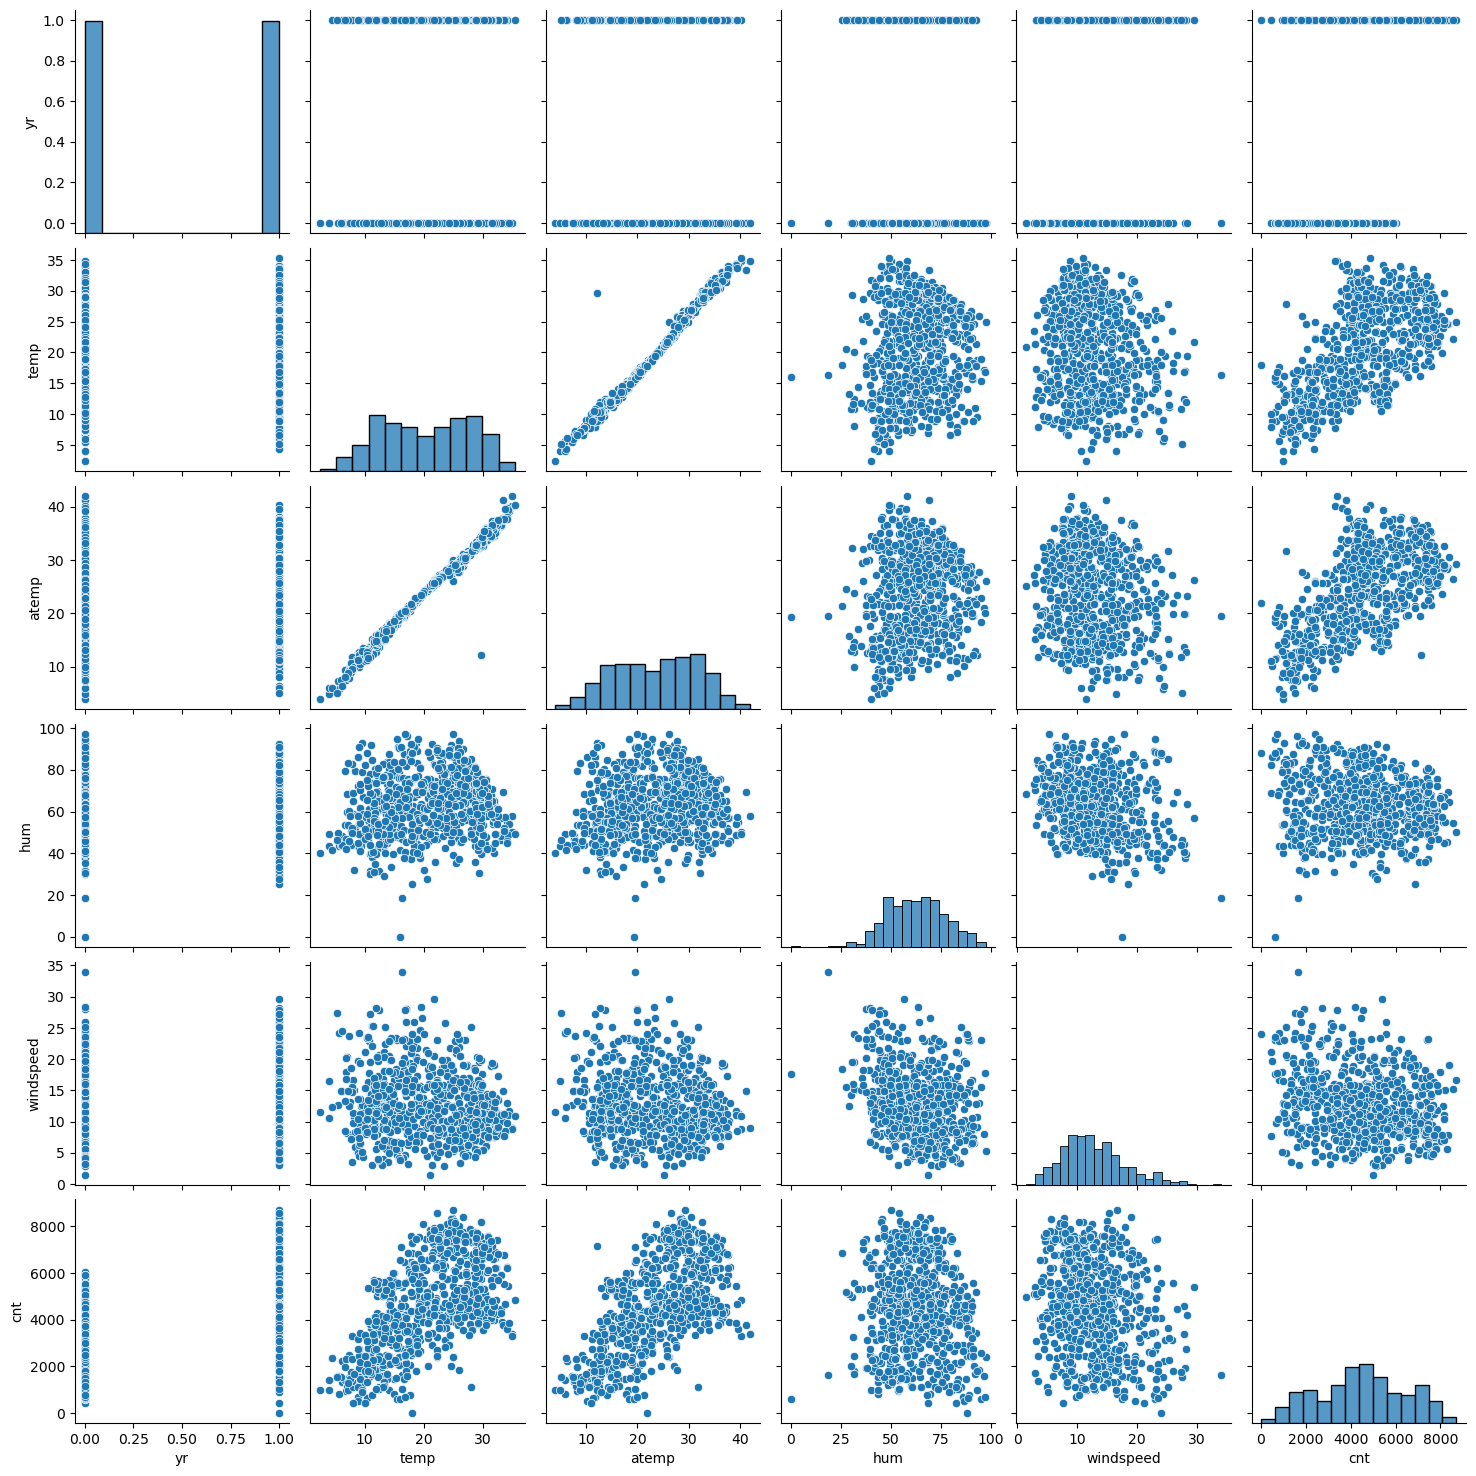

In [398]:
# numerical variables
sns.pairplot(df[num_cols])
plt.show()

### Numerical Cols observations:
- cnt distribution seems to be normal
- cnt seems to have a linear relation with temm and atemp
- hum and windspeed does not seems to be related to cnt
- temp and atemp seems to be co linear, so one needs to be dropped
- Looking at the plots Linear regression is good as some variance in cnt can be explained by numerical variables

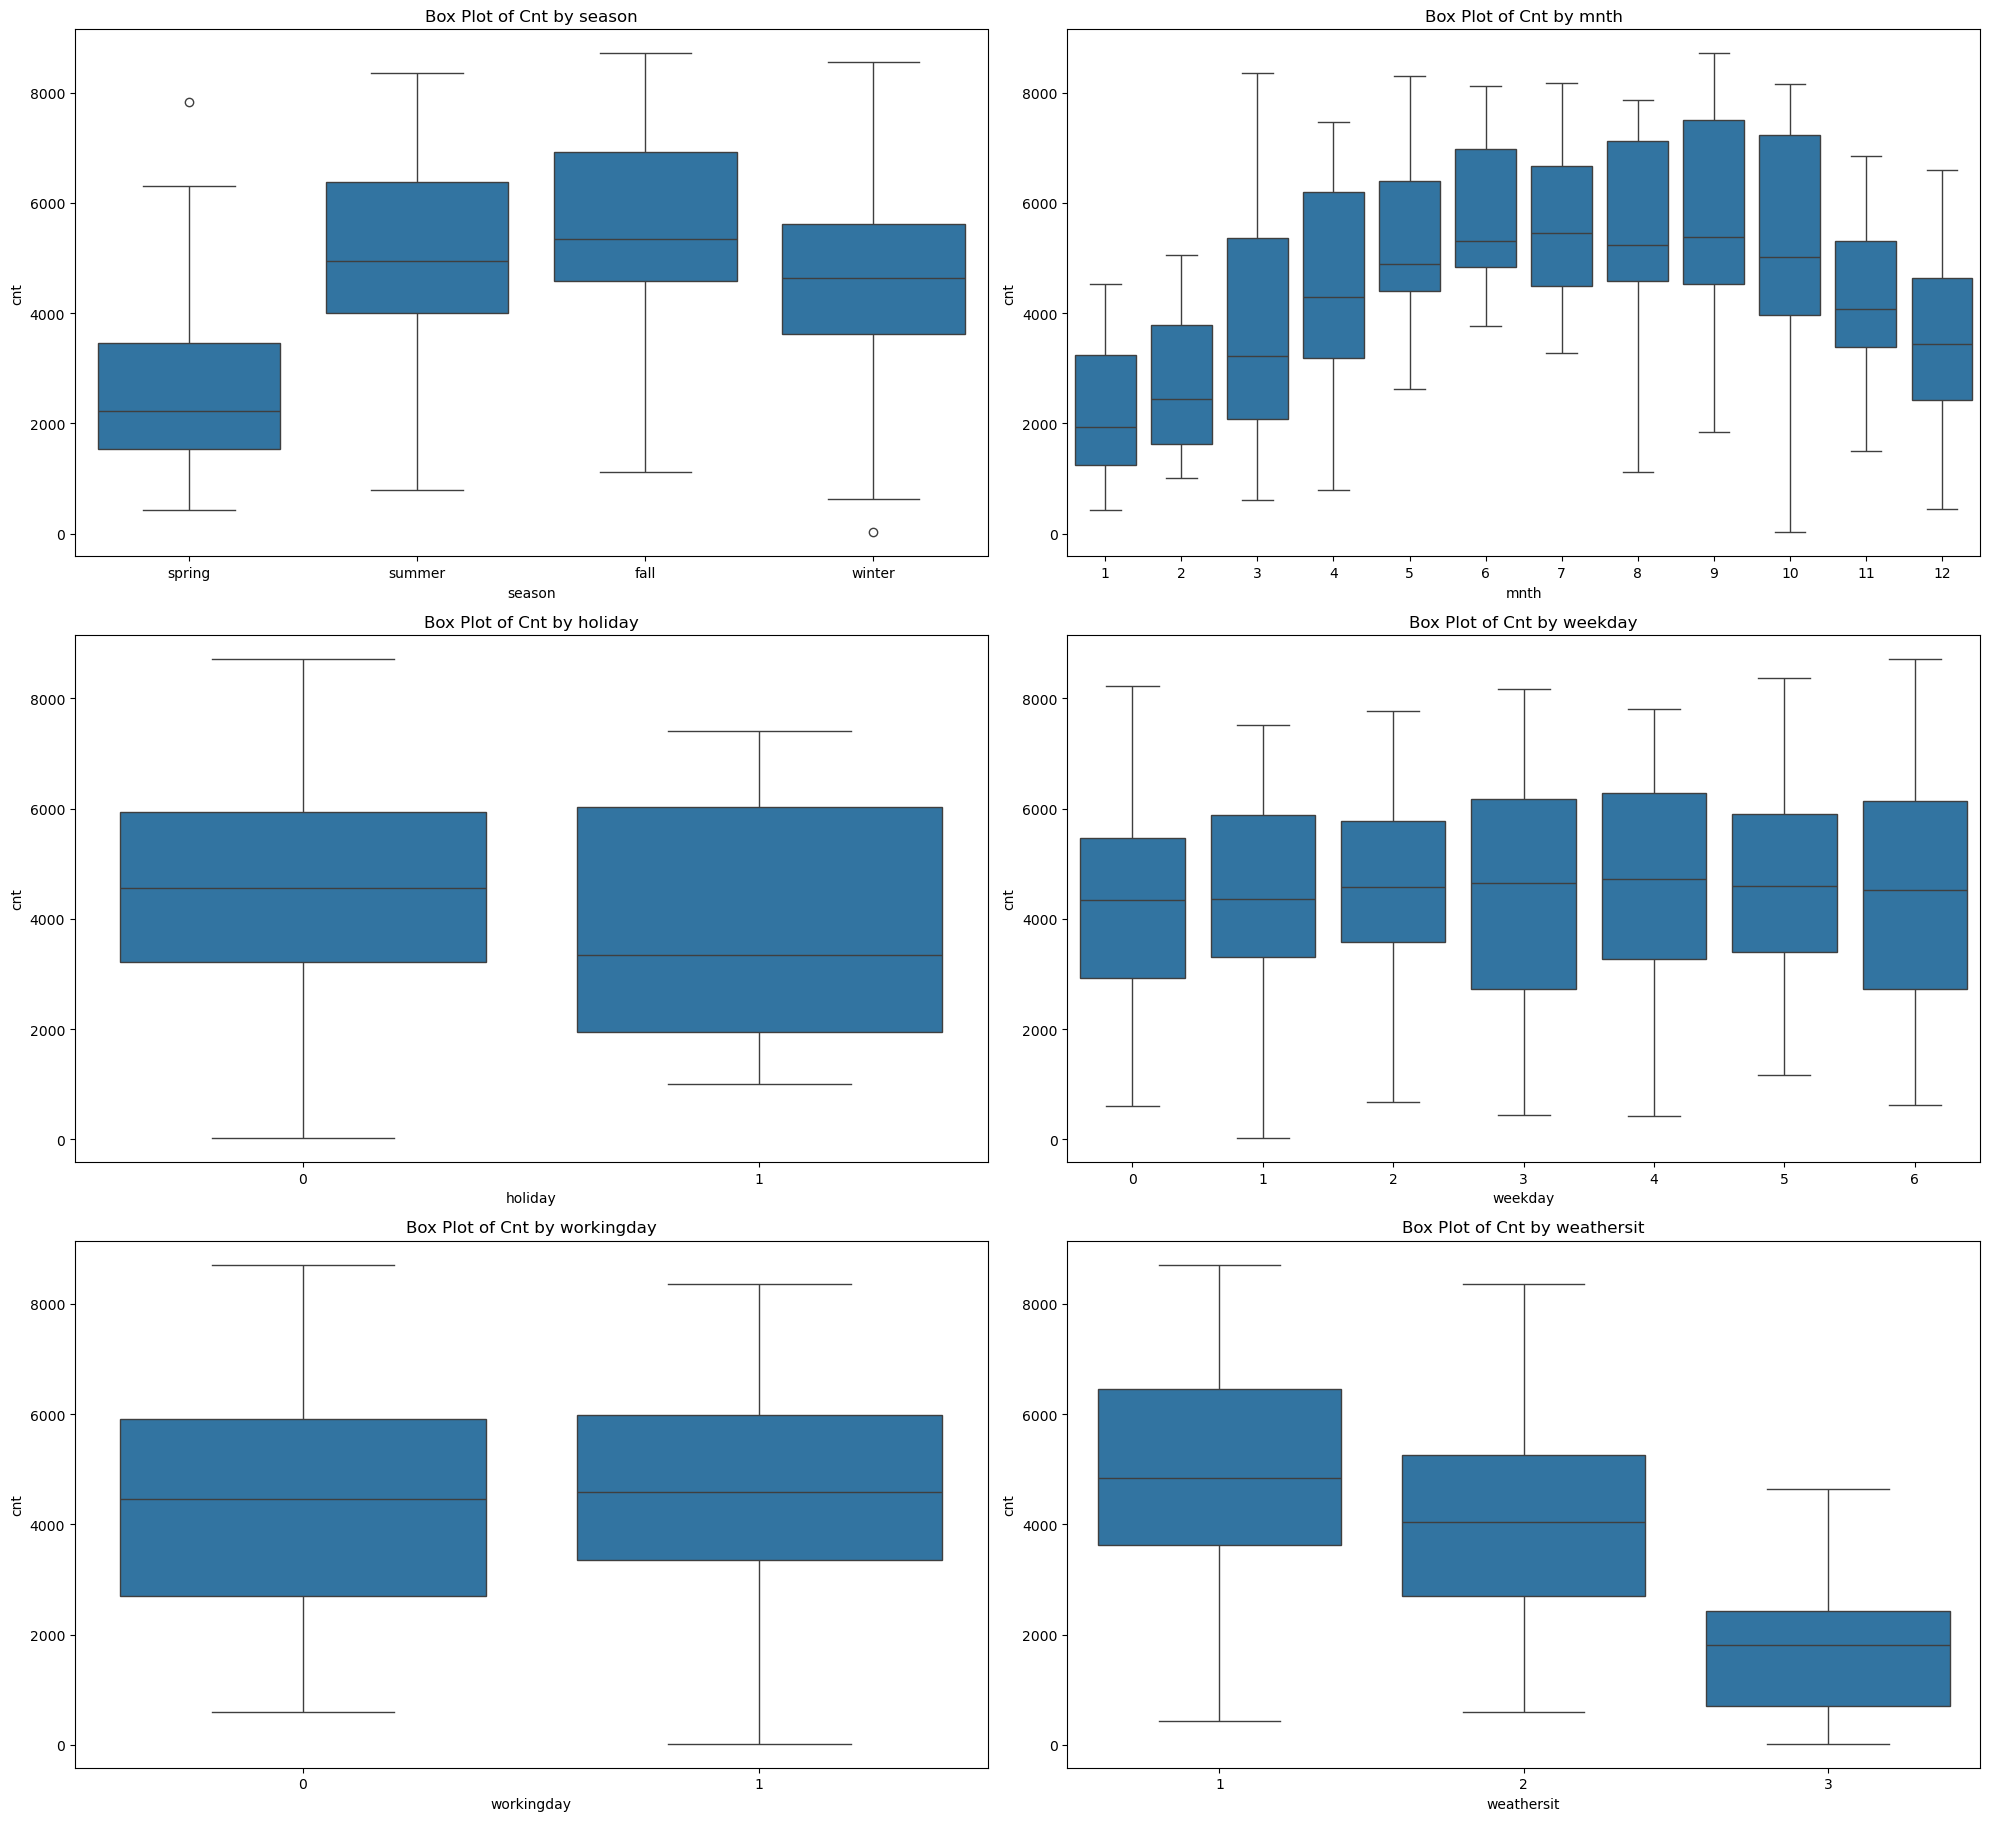

In [400]:
# categorical variables
plt.figure(figsize=(20, 30))  # Set the figure size once

# Loop through each categorical column
for index, col in enumerate(cat_cols):
    plt.subplot(5, 2, index + 1)  # Define the subplot grid (2 rows, 3 columns)
    sns.boxplot(x=col, y="cnt", data=df)  # Create the box plot
    plt.title(f"Box Plot of Cnt by {col}")  # Optional: Add a title for each plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Categorical columns observations:
- Season, weekday, month, holiday, weathersit seems to explain some variance in cnt
- one of season and month is redundant
- workingday, weekday does not seem to have an impact on cnt

### Step 3: Data Preparation
- Encoding
  - Converting 1/0
  - Other cat variables
- Splitting b/w train and test
- rescaling

In [403]:
# drop redundant cols
# df  = df.drop(columns=["mnth", "atemp"]) will use RFE to drop features

In [404]:
# dummies need to be created for season, mnth, weekday, weathersit 
season = pd.get_dummies(df.season, drop_first=True).astype(int)
df['mnth'] = df['mnth'].map(lambda x: calendar.month_abbr[x])
mnth = pd.get_dummies(df.mnth, drop_first=True).astype(int)
df['weekday'] = df['weekday'].map(lambda x: calendar.day_abbr[x])
weekday = pd.get_dummies(df.weekday, drop_first=True).astype(int)
weather_map = {
    1: 'Clear',
    2: 'Mist_Cloudy',
    3: 'Light_Snow_Rain',
    4: 'Heavy_Rain_Thunderstorm'
}
# nodata for 4: Heavy Rain
df['weathersit'] = df['weathersit'].map(weather_map)
weathersit = pd.get_dummies(df.weathersit, drop_first=True).astype(int)

In [405]:
# concatenating dummy variables
df = pd.concat([df, mnth, season, weekday, weathersit], axis=1)
df = df.drop(columns=["mnth", "season", "weekday", "weathersit"])
pd.set_option('display.max_columns', None)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets

In [407]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape, df_test.shape)

(510, 30) (220, 30)


In [408]:
# Rescaling
scalar = MinMaxScaler()
num_vars = ["atemp", "temp", "hum", "windspeed", "cnt"]
# Fit the data
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


### Step 5: Building a linear model

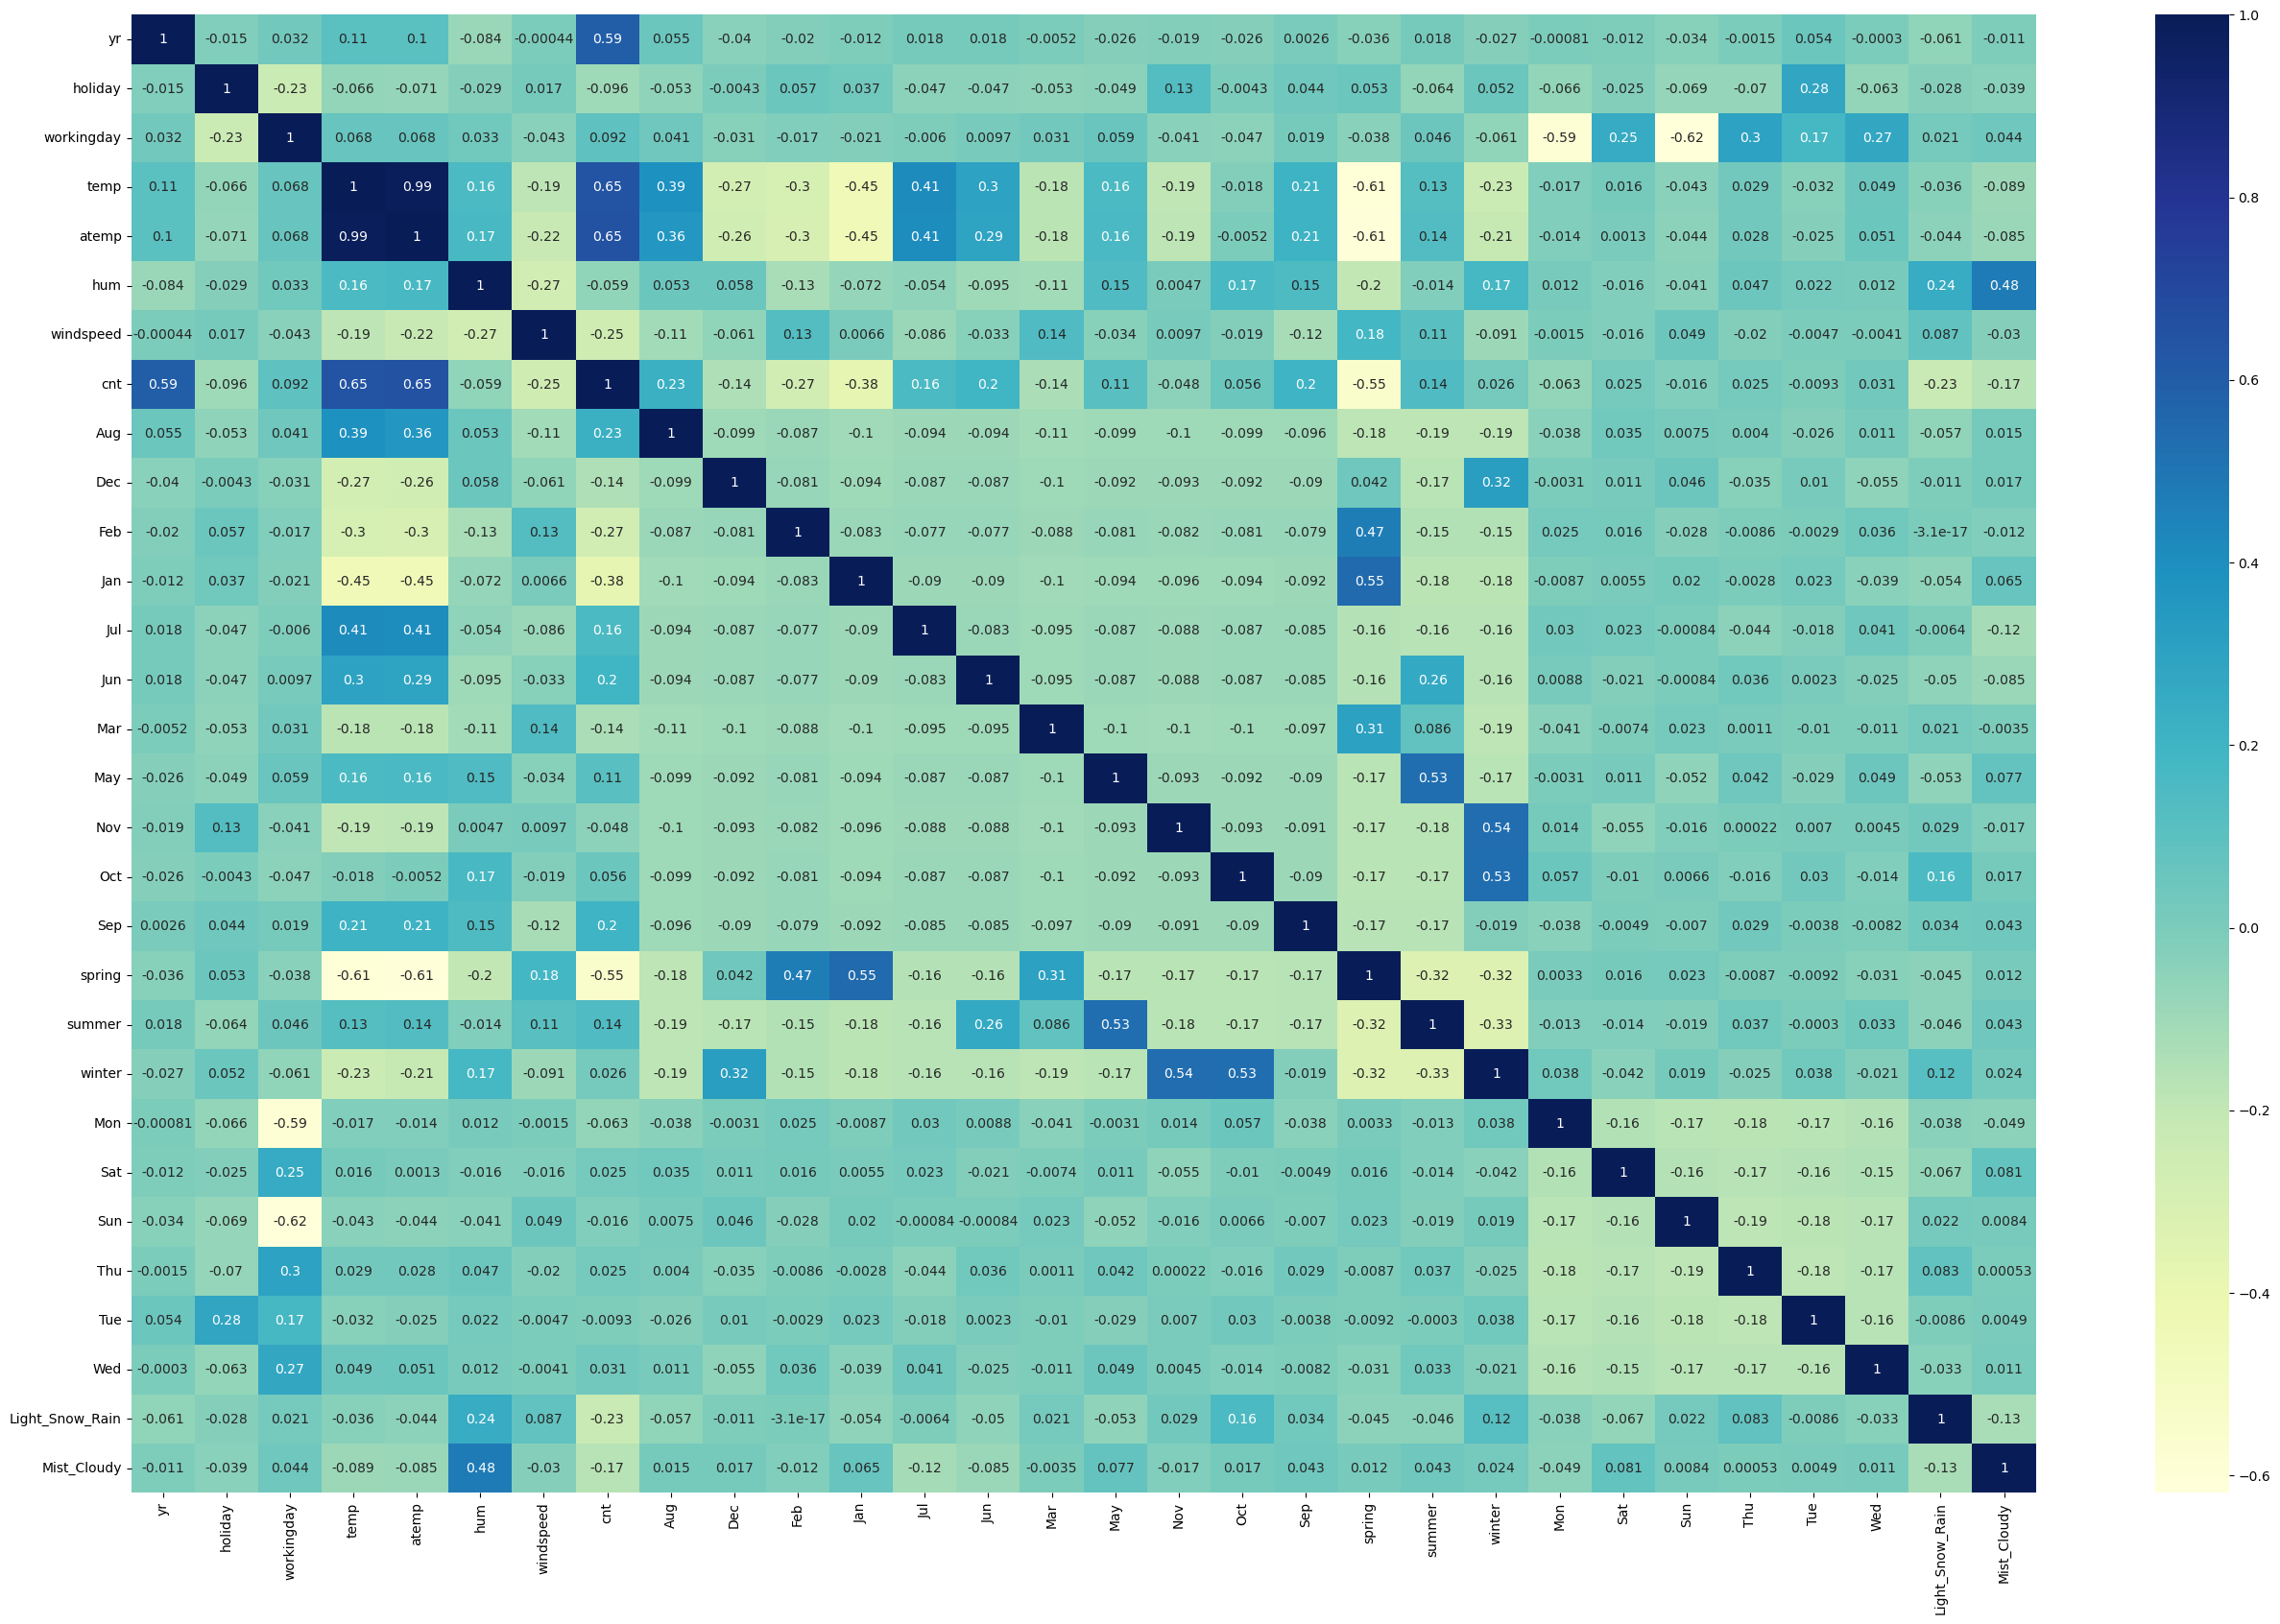

In [410]:
#heatmap
plt.figure(figsize=(32,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Heatmap observation
- Many columns have linear relation with cnt so, Linear regression is possible
- Many columns have high colinearity, so these colums should be identified and dropped by RFE and manula observation of p-values VIF

In [412]:
Y_train = df_train.pop("cnt")
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [495]:
# Procedure for training model
def train(X):
    # Build a mode
    X_sm = sm.add_constant(X)
    # create model
    lr = sm.OLS(Y_train, X_sm)
    # fit the model
    lr_model = lr.fit()
    # summary
    print(lr_model.summary())
    return lr_model

# procedure to calculate VIF
def VIF(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.index = range(1, len(vif) + 1)
    print(vif)

# P-value- VIF approach
# High - High: Remove
# Low - Low: Retain
# High - Low : Remove forst
# Low - High : Access

In [414]:
# Significance - p-values
# VIF : how a feature variable is related to other variables
# Initial model with all variables
#train(X_train)
#VIF(X_train)
# Dropping Thu column
#X = X_train.drop("Thu", axis = 1)
#train(X)
#VIF(X)
# dropping holiday
#X = X.drop("holiday", axis = 1)
#train(X)
#VIF(X)
# dropping Sat
#X = X.drop("Sat", axis = 1)
#train(X)
#VIF(X)
# dropping Mon
#X = X.drop("Mon", axis = 1)
#train(X)
#VIF(X)
# dropping hum
# X = X.drop("hum", axis = 1)
# train(X)
# VIF(X)
# # dropping hum
# X = X.drop("windspeed", axis = 1)
# train(X)
# VIF(X)
# As the numbe of columns were less manual approached worked well and about 12% of variance in cnt was explaind. Other factors also looked very good 

In [415]:
# Using REF for Feature selection
# Importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [416]:
X_train.shape

(510, 29)

In [439]:
# Running RFE with the 10 as the number of output variables
lm = LinearRegression();
lm.fit(X_train, Y_train)
rfe = RFE(estimator=lm, n_features_to_select=12)
rfe.fit(X_train, Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [441]:
sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x: x[2], reverse=True)

[('Mar', False, 18),
 ('Thu', False, 17),
 ('Jun', False, 16),
 ('Oct', False, 15),
 ('Sat', False, 14),
 ('Wed', False, 13),
 ('Tue', False, 12),
 ('Mon', False, 11),
 ('Aug', False, 10),
 ('May', False, 9),
 ('atemp', False, 8),
 ('Feb', False, 7),
 ('Dec', False, 6),
 ('Nov', False, 5),
 ('Jan', False, 4),
 ('workingday', False, 3),
 ('Sun', False, 2),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Jul', True, 1),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_Snow_Rain', True, 1),
 ('Mist_Cloudy', True, 1)]

In [445]:
col = X_train.columns[rfe.support_]
col_drop = X_train.columns[~rfe.support_]
print(col, col_drop)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep', 'spring',
       'summer', 'winter', 'Light_Snow_Rain', 'Mist_Cloudy'],
      dtype='object') Index(['workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')


In [447]:
X_train[col]

,yr,holiday,temp,hum,windspeed,Jul,Sep,spring,summer,winter,Light_Snow_Rain,Mist_Cloudy
576,1,0,0.815169,0.725633,0.264686,1,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,1,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,1,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,0,0,1,0,1
79,0,0,0.462664,0.759870,0.529881,0,0,0,1,0,0,1


In [449]:
# drop col_drop cols as suggested by RFE
X_train = X_train.drop(columns=col_drop)
train(X_train)
VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          2.95e-190
Time:                        13:28:23   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2848      0.034     

### Step 6: Residual Analysis of the train data

In [455]:
# dropping hum
X = X_train.drop(columns=["hum"], axis = 1)
train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          5.06e-187
Time:                        13:33:35   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [485]:
# dropping hum, temp
X = X_train.drop(columns=["hum","temp"], axis = 1)
train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          5.02e-149
Time:                        13:59:11   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5837      0.017     

In [497]:
# temp seems to severely affect R-Squared. Hence dropping windspeed instead of temp
# dropping hum, windspeed
X = X_train.drop(columns=["hum","windspeed"], axis = 1)
model = train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          5.71e-181
Time:                        14:13:53   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1501      0.029     

### At this point we have:
- R-Squared and Adjusted R-Squared are sufficiently good at ~82%
- VIF for all Features < 5
- p-values for all values < .05
- This meeans we have decently goot mode and we can proceed to test

## Residual Analysis

In [504]:
X_pred = sm.add_constant(X)
Y_train_cnt = model.predict(X_pred)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

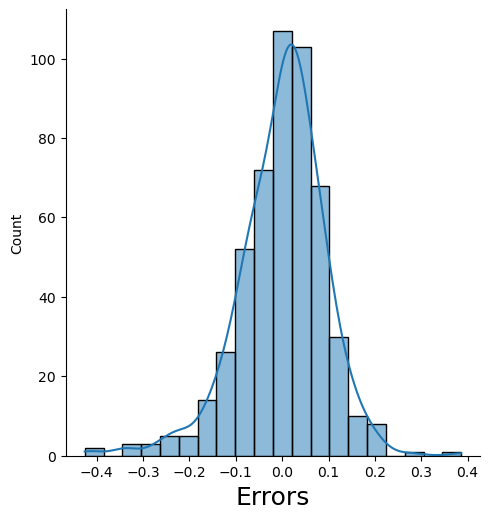

In [510]:
fig = plt.figure()
sns.displot((Y_train - Y_train_cnt), bins=20, kde=True)
fig.suptitle("Error terms", fontsize=24)
plt.xlabel("Errors", fontsize=18)

### Step 7: Making Predictions Using the Final Model

In [516]:
df_test[num_vars] = scalar.transform(df_test[num_vars])

In [518]:
Y_test = df_test.pop("cnt")
X_test = df_test

In [526]:
X_test_new = X_test[X.columns]
X_test_new = sm.add_constant(X_test_new)

In [530]:
# Make prediction
Y_pred = model.predict(X_test_new)

### Step 8: Model Evaluation

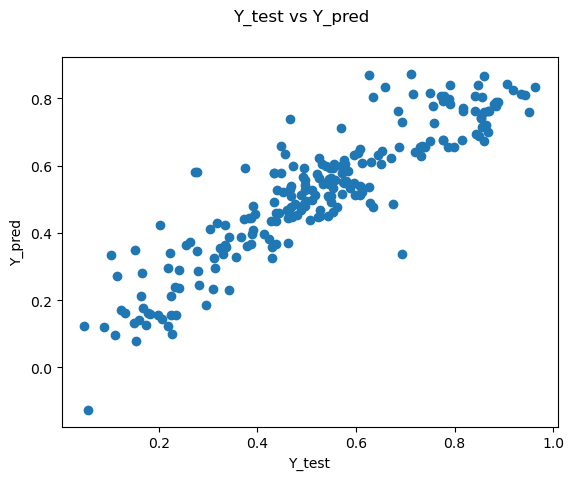

In [532]:
fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle("Y_test vs Y_pred")
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

### Model Summary Overview
### R-squared: 0.824
- This indicates that 82.4% of the variance in bike demand is explained by the variables in your model.
Adjusted R-squared: 0.820
This is a slight reduction from the R-squared value, accounting for the number of predictors. It still suggests a good fit, with 82% of the variance explained.
### F-statistic: 233.3 (p-value: 5.71e-181)
- This very high F-statistic and an extremely low p-value imply that your overall model is statistically significant.
### Durbin-Watson statistic: 2.044
- This value close to 2 indicates that there is likely no autocorrelation in the residuals, suggesting that the model's errors are independent.

### Key Insights from the Significant Variables
- Year (yr):
    - A positive coefficient (0.2326) indicates that bike demand has significantly increased in the second year.
- Temperature (temp):
    - The strong positive coefficient (0.5029) suggests that warmer temperatures drive higher bike usage.
- Weather Conditions:
    - Light Snow or Rain has a significant negative effect on bike demand, with a large negative coefficient (-0.2989).
    - Mist or Cloudy weather also has a negative impact (-0.0785).
- Seasonal Effects:
    - Spring shows a decrease in demand (-0.0766), while winter has an increase (0.0829).
    - July has a slight negative impact, while September shows a positive effect on demand.
- Holidays:
    - The coefficient for holiday is negative (-0.1003), indicating that demand drops on holidays.Key Insights from the Significant Variables


### Interpreting the Coefficients

| **Variable**        | **Coefficient** | **Std Err** | **t-value** | **p-value** | **95% Confidence Interval** | **Interpretation** |
|---------------------|-----------------|--------------|-------------|-------------|----------------------------|---------------------|
| **const**           | 0.1501         | 0.029        | 5.124       | 0.000       | [0.093, 0.208]             | The intercept. |
| **yr**              | 0.2326         | 0.009        | 27.333      | 0.000       | [0.216, 0.249]             | **Highly significant**. Positive impact on bike demand. |
| **holiday**         | -0.1003        | 0.027        | -3.721      | 0.000       | [-0.153, -0.047]           | **Significant**. Holidays reduce bike demand. |
| **temp**            | 0.5029         | 0.034        | 14.670      | 0.000       | [0.436, 0.570]             | **Highly significant**. Warmer temperatures increase bike demand. |
| **Jul**             | -0.0523        | 0.019        | -2.715      | 0.007       | [-0.090, -0.014]           | **Significant**. Bike demand decreases in July. |
| **Sep**             | 0.0812         | 0.018        | 4.623       | 0.000       | [0.047, 0.116]             | **Significant**. Bike demand increases in September. |
| **spring**          | -0.0766        | 0.022        | -3.514      | 0.000       | [-0.119, -0.034]           | **Significant**. Lower bike demand in spring. |
| **summer**          | 0.0367         | 0.016        | 2.342       | 0.020       | [0.006, 0.067]             | **Significant**. Slight increase in summer demand. |
| **winter**          | 0.0829         | 0.018        | 4.642       | 0.000       | [0.048, 0.118]             | **Significant**. Higher bike demand in winter. |
| **Light_Snow_Rain** | -0.2989        | 0.025        | -11.756     | 0.000       | [-0.349, -0.249]           | **Highly significant**. Bad weather (snow/rain) decreases bike demand. |
| **Mist_Cloudy**     | -0.0785        | 0.009        | -8.669      | 0.000       | [-0.096, -0.061]           | **Highly significant**. Mist/cloudy weather reduces demand. |
